In [1]:
%load_ext lab_black

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.optim import AdamW

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
class SCAE(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv1d(6, 3, 5, padding=2, padding_mode="circular")
        self.conv2 = nn.Conv1d(3, 6, 5, padding=2, padding_mode="circular")
        self.conv2 = nn.Conv1d(3, 6, 5, padding=2, padding_mode="circular")

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)

        return x

In [4]:
data = np.load("data/0214.npz")

In [5]:
X = data["X_train"]
Y = data["Y_train"]

In [6]:
x = X[0:1]
y = Y[0:1]

In [7]:
ds = TensorDataset(
    torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.long)
)

In [8]:
dl = DataLoader(ds, batch_size=128, shuffle=True)

In [9]:
model = SCAE()

In [10]:
criterion = nn.L1Loss()
optimizer = AdamW(model.parameters())

In [11]:
for epoch in tqdm(list(range(1, 11)), ncols=100):
    xs, ps = [], []
    for x, y in dl:
        p = model(x)
        loss = criterion(p, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        xs.append(x)
        ps.append(p)

100%|███████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.13it/s]


In [12]:
xs = torch.cat(xs)
ps = torch.cat(ps)

In [13]:
xs.shape, ps.shape

(torch.Size([3125, 6, 600]), torch.Size([3125, 6, 600]))

In [14]:
x_ = torch.roll(x, 300, dims=2)

In [15]:
p_ = model(x_)

In [20]:
x_.shape

torch.Size([53, 6, 600])

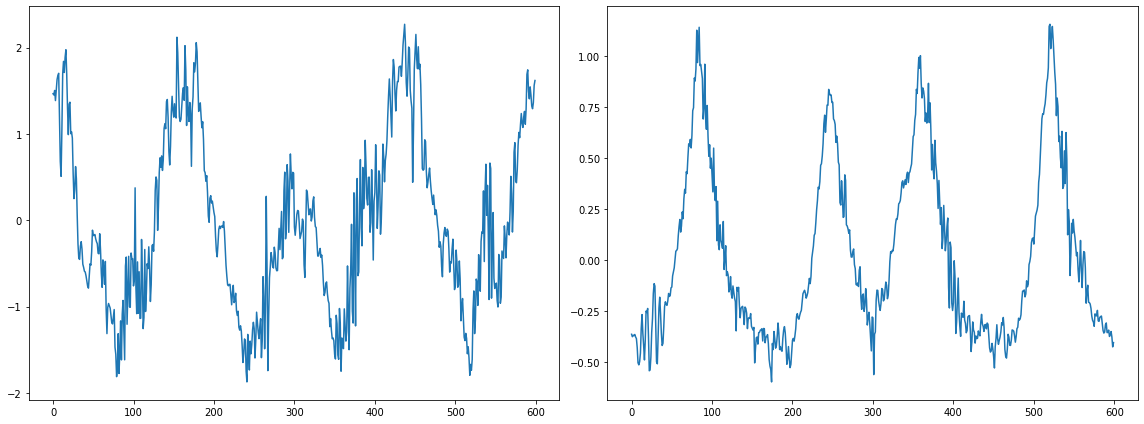

In [23]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(x_[1].transpose(0, 1)[:, 2])
plt.subplot(1, 2, 2)
plt.plot(p_[1].transpose(0, 1).detach()[:, 2])
plt.tight_layout()
plt.show()